In [46]:
import Data_Align
import importlib
importlib.reload(Data_Align)
import numpy as np
import pandas as pd
import typing
from numpy.lib.histograms import _hist_bin_sqrt
from numpy.polynomial import Polynomial
from pprint import pprint
import pypg
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.linalg import hankel
from scipy.optimize import minimize
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import signal
import padasip as pa
import nolds
import antropy
import entropy
import EntropyHub

In [47]:
# 读取前测eeg ppg imu
precedent_eeg_path=r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/gateway_eegdata_csv/庞日宠_1752046302_1752047814_precedent_stage_signals_1.csv"
ppg_folder=r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/ppg_green_raw/250709/"
imu_folder=r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/imu_raw/250709"
hr_folder=r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/ppg_hr/250709"
hrv_folder=r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/ppg_hrv/250709"
pre_event_signals=Data_Align.align_Epoch_data(precedent_eeg_path, ppg_folder, imu_folder, hr_folder, hrv_folder)
# 读取后测eeg ppg imu
post_eeg_path=r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/gateway_eegdata_csv/庞日宠_1752050945_1752052418_posterior_stage_signals_1.csv"
post_event_signals=Data_Align.align_Epoch_data(post_eeg_path, ppg_folder, imu_folder, hr_folder, hrv_folder)

2025-07-25 17:54:12,660 - INFO - ===== 开始处理文件: /Users/yukunlong/Documents/working/ppg_modeling/test4Pang/gateway_eegdata_csv/庞日宠_1752046302_1752047814_precedent_stage_signals_1.csv =====
2025-07-25 17:54:13,554 - INFO - 成功加载数据，共 754000 行，列名：['timestep', 'device_info_id', 'eeg_channel1', 'eeg_channel2', 'eeg_channel3', 'eeg_channel4', 'eog_channel1', 'eog_channel2', 'trigger_channel', 'ppg_red', 'ppg_infrared', 'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z', 'image_path', 'label']
2025-07-25 17:54:13,856 - INFO - 检测到起始trigger: 1，时间戳: 1752046338908.0ms
2025-07-25 17:54:14,348 - INFO - 检测到结束trigger: 10，时间戳: 1752046458960.0ms
2025-07-25 17:54:14,348 - INFO - 事件匹配成功: 1 -> 10，时间范围: 1752046338908.0ms ~ 1752046458960.0ms，持续 120052.0ms
2025-07-25 17:54:14,396 - INFO - 检测到起始trigger: 6，时间戳: 1752046470292.0ms
2025-07-25 17:54:15,158 - INFO - 检测到结束trigger: 60，时间戳: 1752046650370.0ms
2025-07-25 17:54:15,158 - INFO - 事件匹配成功: 6 -> 60，时间范围: 1752046470292.0ms ~ 1752046650

成功读取文件: aligned_17.csv，数据形状: (105736, 5)
成功读取文件: aligned_16.csv，数据形状: (359898, 5)
成功读取文件: aligned_15.csv，数据形状: (212407, 5)
所有文件合并完成，总数据形状: (678041, 5)
成功读取文件: aligned_17.csv，数据形状: (105874, 7)
成功读取文件: aligned_16.csv，数据形状: (359796, 7)
成功读取文件: aligned_15.csv，数据形状: (213000, 7)
所有文件合并完成，总数据形状: (678670, 7)
成功读取文件: 16.csv，数据形状: (359, 2)
成功读取文件: 17.csv，数据形状: (105, 2)
成功读取文件: 15.csv，数据形状: (210, 2)
所有文件合并完成，总数据形状: (674, 2)
成功读取文件: aligned_17.csv，数据形状: (1084, 2)
成功读取文件: aligned_16.csv，数据形状: (4233, 2)
成功读取文件: aligned_15.csv，数据形状: (2362, 2)
所有文件合并完成，总数据形状: (7679, 2)
帧率抖动: 8960.04 ms
丢包率: 0.0
真实采样率: -188.4
对齐后脑eeg数据：(754000, 19)
对齐后脑ppg数据：(150800, 5)
对齐后脑电采集时间：1508.0
对齐后PPG的采集时间：1508.0
ppg开始时间1752046338910.0ms, imu开始时间1752046338910.0ms
ppg开始时间1752046470300.0ms, imu开始时间1752046470300.0ms
ppg开始时间1752046661590.0ms, imu开始时间1752046661590.0ms
ppg开始时间1752046792500.0ms, imu开始时间1752046792500.0ms
ppg开始时间1752046982300.0ms, imu开始时间1752046982300.0ms
ppg开始时间1752047022010.0ms, imu开始时间1752047022010.0ms
ppg开始时间175204

2025-07-25 17:54:21,901 - INFO - ===== 开始处理文件: /Users/yukunlong/Documents/working/ppg_modeling/test4Pang/gateway_eegdata_csv/庞日宠_1752050945_1752052418_posterior_stage_signals_1.csv =====
2025-07-25 17:54:22,634 - INFO - 成功加载数据，共 736000 行，列名：['timestep', 'device_info_id', 'eeg_channel1', 'eeg_channel2', 'eeg_channel3', 'eeg_channel4', 'eog_channel1', 'eog_channel2', 'trigger_channel', 'ppg_red', 'ppg_infrared', 'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z', 'image_path', 'label']
2025-07-25 17:54:22,859 - INFO - 检测到起始trigger: 5，时间戳: 1752050965500.0ms
2025-07-25 17:54:23,348 - INFO - 检测到结束trigger: 50，时间戳: 1752051085564.0ms
2025-07-25 17:54:23,349 - INFO - 事件匹配成功: 5 -> 50，时间范围: 1752050965500.0ms ~ 1752051085564.0ms，持续 120064.0ms
2025-07-25 17:54:23,435 - INFO - 检测到起始trigger: 6，时间戳: 1752051106012.0ms
2025-07-25 17:54:24,170 - INFO - 检测到结束trigger: 60，时间戳: 1752051286064.0ms
2025-07-25 17:54:24,171 - INFO - 事件匹配成功: 6 -> 60，时间范围: 1752051106012.0ms ~ 1752051286

成功读取文件: aligned_17.csv，数据形状: (105736, 5)
成功读取文件: aligned_16.csv，数据形状: (359898, 5)
成功读取文件: aligned_15.csv，数据形状: (212407, 5)
所有文件合并完成，总数据形状: (678041, 5)
成功读取文件: aligned_17.csv，数据形状: (105874, 7)
成功读取文件: aligned_16.csv，数据形状: (359796, 7)
成功读取文件: aligned_15.csv，数据形状: (213000, 7)
所有文件合并完成，总数据形状: (678670, 7)
成功读取文件: 16.csv，数据形状: (359, 2)
成功读取文件: 17.csv，数据形状: (105, 2)
成功读取文件: 15.csv，数据形状: (210, 2)
所有文件合并完成，总数据形状: (674, 2)
成功读取文件: aligned_17.csv，数据形状: (1084, 2)
成功读取文件: aligned_16.csv，数据形状: (4233, 2)
成功读取文件: aligned_15.csv，数据形状: (2362, 2)
所有文件合并完成，总数据形状: (7679, 2)
帧率抖动: 8960.04 ms
丢包率: 0.0
真实采样率: -188.4
对齐后脑eeg数据：(736000, 19)
对齐后脑ppg数据：(147200, 5)
对齐后脑电采集时间：1472.0
对齐后PPG的采集时间：1472.0
ppg开始时间1752050965508.0ms, imu开始时间1752050965510.0ms
ppg开始时间1752051106018.0ms, imu开始时间1752051106020.0ms
ppg开始时间1752051291718.0ms, imu开始时间1752051291720.0ms
ppg开始时间1752051419428.0ms, imu开始时间1752051419430.0ms
ppg开始时间1752051608655.0ms, imu开始时间1752051608650.0ms
ppg开始时间1752051642505.0ms, imu开始时间1752051642500.0ms
ppg开始时间175205

In [ ]:
# class ssa_process:    
#     def __init__(self, n_freq_bins=4096):
#         self.n_freq_bins = n_freq_bins
        
#     def ssa(self,ts: np.ndarray, L: int, perform_grouping: bool = True, wcorr_threshold: float = 0.3, ret_Wcorr: bool = False):
#             """
#             Performs SSA on ts
#             https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition

#             Parameters
#             ----------
#                 ts : ndarray of shape (n_timestamps, )
#                     The time series to decompose
#                 L : int
#                     first dimension of the L-trajectory-matrix
#                 grouping : bool, default=True
#                     If True, perform grouping based on the w-correlations of the deconstructed time series
#                     using agglomerative hierarchical clustering with single linkage.
#                     If this parameter is True, the parameter distance_threshold must be set.
#                 wcorr_threshold : float, default=0.3
#                     The w-correlation threshold used with the agglomerative hierarchical clustering.
#                     Time series with at least this w-correlation will be grouped together.
#                     This parameter will be ignored if grouping is set to False.
#                 ret_Wcorr : bool, default=False
#                     Whether the resulting w-correlation matrix should be returned.
#                     If grouping is enabled, return the w-correlation matrix of the grouped time series.
#                     If grouping is disabled, return the w-correlation matrix of the ungrouped time series.
                

#             Returns
#             ----------
#                 Y : ndarray of shape (n_groups, n_timestamps) if grouping is enabled and (L, n_timestamps) if it is disabled.
#                 Wcorr : ndarray
#                     The Wcorrelation matrix.
#                     Wcorr will only be returned if ret_Wcorr is True
#             """
#             N = len(ts)
#             K = N - L + 1

#             L_trajectory_matrix = hankel(ts[:L], ts[L-1:]) # (L, K)
#             U, Sigma, V = np.linalg.svd(L_trajectory_matrix) # (L, L); (d, ); (K, K)
#             V = V.T # (K, K)
#             d = len(Sigma)

#             deconstructed_ts = []
#             for i in range(d):
#                 X_elem = np.array(Sigma[i] * np.outer(U[:,i], V[:,i])) # (L, K)
#                 X_elem_rev = X_elem[::-1] # (L, K)
#                 ts_i = np.array([X_elem_rev.diagonal(i).mean() for i in range(-L+1, K)])
#                 deconstructed_ts.append(ts_i)
#             deconstructed_ts = np.array(deconstructed_ts) # (d, L, K)
            
#             if not perform_grouping and not ret_Wcorr:
#                 return deconstructed_ts
            

#             w = np.concatenate((np.arange(1, L+1), np.full((K-L,), L), np.arange(L-1, 0, -1)))
#             def wcorr(ts1: np.ndarray, ts2: np.ndarray) -> float:
#                 """
#                 weighted correlation of ts1 and ts2.
#                 w is precomputed for reuse.
#                 """
#                 w_covar = (w * ts1 * ts2).sum()
#                 ts1_w_norm = np.sqrt((w * ts1 * ts1).sum())
#                 ts2_w_norm = np.sqrt((w * ts2 * ts2).sum())
                
#                 return w_covar / (ts1_w_norm * ts2_w_norm)

#             Wcorr_mat = pairwise_distances(deconstructed_ts, metric=wcorr)

#             if not perform_grouping:
#                 return deconstructed_ts, Wcorr_mat

#             Wcorr_mat_dist = 1 - Wcorr_mat
#             distance_threshold = 1 - wcorr_threshold
#             agg_clust = AgglomerativeClustering(metric='precomputed', linkage='single',
#                                                 distance_threshold=distance_threshold, n_clusters=None)
#             clust_labels = agg_clust.fit_predict(Wcorr_mat_dist)
#             n_clusters = clust_labels.max() + 1
#             grouped_ts = [np.sum(deconstructed_ts[clust_labels == cluster_id], axis=0) 
#                         for cluster_id in range(n_clusters)]
#             grouped_ts = np.array(grouped_ts)
            
#             if not ret_Wcorr:
#                 return grouped_ts
            
#             Wcorr_mat = pairwise_distances(grouped_ts, metric=wcorr)
#             return grouped_ts, Wcorr_mat
    
#     def _get_dominant_frequencies(self, spectrum: np.ndarray, axis=-1, threshold=.5):
#         """
#         Given the frequency spectra of one or multiple signals, compute the dominant frequencies along a specified axis.

#         Parameters
#         ----------
#             sig : ndarray
#                 The signals to compute the dominant frequencies on.
#             axis : int, default=-1
#                 The axis along which to compute the dominant frequencies.
#             threshold : float, default=0.5
#                 The threshold which divides dominant and non-dominant frequencies.
#                 A dominant frequency has a peak of amplitude of higher than threshold times the maximum amplitude in that spectrum

#         Returns
#         ----------
#             dom_freqs : ndarray
#                 dom_freqs has the same shape as sig.
#                 Iff a value in sig corresponds to a dominant frequency, this value is set to True in dom_freqs.
#         """

#         max_amplitudes = np.max(spectrum, axis=axis, keepdims=True)
#         dom_freqs = spectrum > threshold * max_amplitudes

#         return dom_freqs

#     def get_Facc(self, acc_window: np.ndarray, hr: int, delta: int = 10):
#         # from actual hr ger hr_idx
#         hr_hz = hr / 60
#         hr_idx = int(round(hr_hz/100*self.n_freq_bins))

#         _, acc_freqs = signal.periodogram(acc_window, nfft=self.n_freq_bins * 2 - 1)
#         acc_dom_freqs = self._get_dominant_frequencies(acc_freqs)
#         F_acc = np.logical_or.reduce(acc_dom_freqs)
#         N_p = np.arange(hr_idx, self.n_freq_bins + 1, hr_idx)
#         for idx in N_p:
#             F_acc[idx-delta : idx+delta] = False
        
#         return F_acc       

#     def filter_ssa_groups(self, ssa_groups: np.ndarray, F_acc: np.ndarray):
#         _,ssa_groups_spectra = signal.periodogram(ssa_groups, nfft=self.n_freq_bins * 2 - 1)
#         ssa_dom_freqs = self._get_dominant_frequencies(ssa_groups_spectra)
#         group_filter = np.logical_or.reduce(np.logical_and(ssa_dom_freqs, F_acc), axis=1)
#         group_filter = np.logical_not(group_filter)

#         return ssa_groups[group_filter]

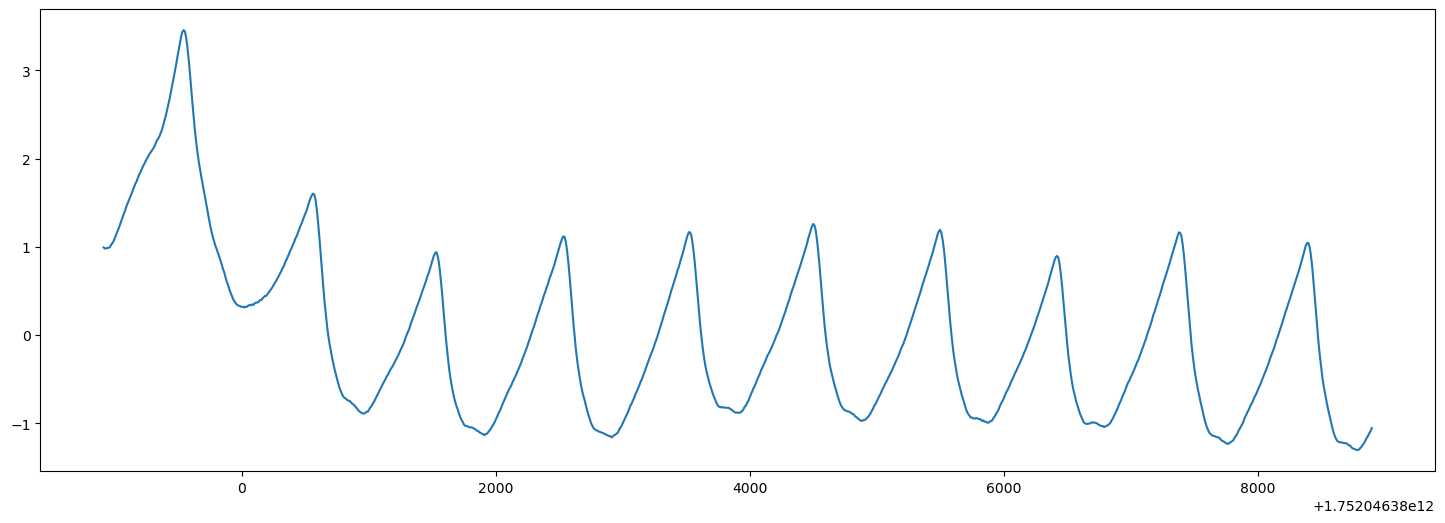

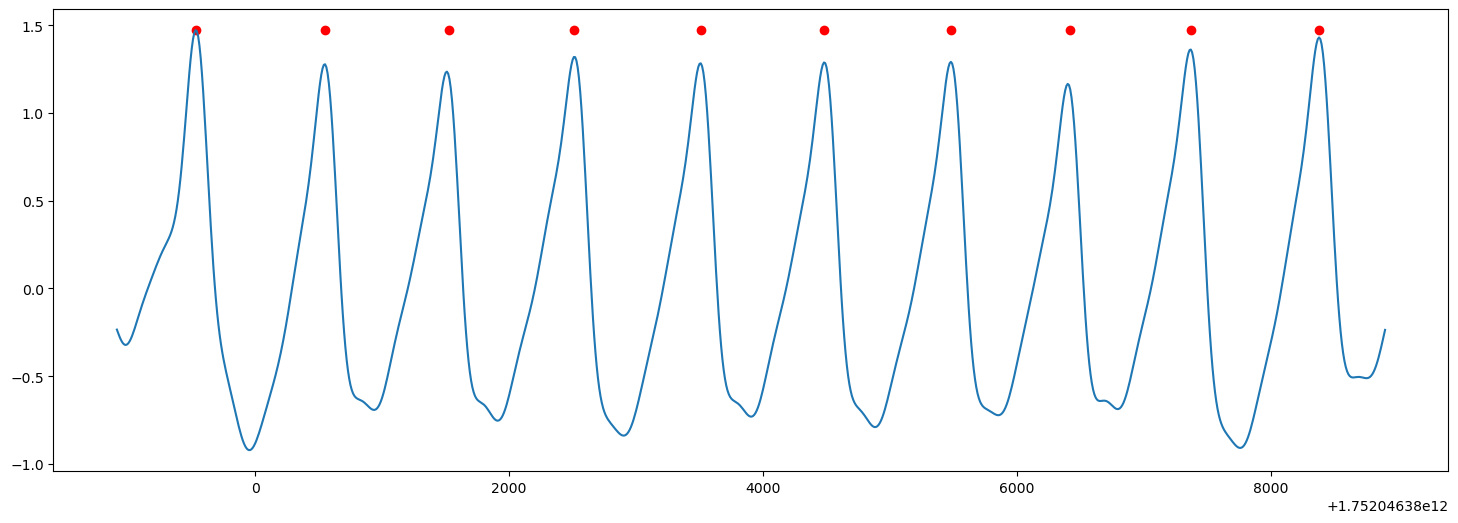

In [ ]:
# event = 0
# raw_ppg_signal = pre_event_signals[event]['ppg_data'][:, 1:5]  # shape: (n_samples, 4)  # shape: (n_samples,)
# # windowring

# window_length = 10
# i=5
# raw_ppg_signal = raw_ppg_signal[window_length*100*(i-1):window_length*100*i]
# normalized_ppg = (raw_ppg_signal - np.mean(raw_ppg_signal, axis=0)) / np.std(raw_ppg_signal, axis=0)
# raw_ppg_signal = np.mean(normalized_ppg, axis=1)
# IMU_signal = np.array(pre_event_signals[event]['imu_data'][window_length*100*(i-1):window_length*100*i, 1: 4])
# t=np.array(pre_event_signals[event]['ppg_data'][window_length*100*(i-1):window_length*100*i,0])
# hr_mask=(pre_event_signals[event]['hr_data'][:,0] >= t[0]) & (pre_event_signals[event]['hr_data'][:,0]<=t[-1])
# hrv_mask=(pre_event_signals[event]['hrv_data'][:,0] >= t[0]) & (pre_event_signals[event]['hrv_data'][:,0]<=t[-1])
# hr=np.array(pre_event_signals[event]['hr_data'][hr_mask, 1])
# hrv_window=np.array(pre_event_signals[event]['hrv_data'][hrv_mask, :])
# hr=np.mean(hr)
# # 0.3-5hz 4 order butterworth bandpass filter in band ma removal
# b, a = signal.butter(4, [0.4, 5], btype='bandpass', fs=100)
# filtered_signal = signal.filtfilt(b, a, raw_ppg_signal)
# # IMU filtering
# filtered_IMU_x = signal.filtfilt(b, a, IMU_signal[:, 0])
# filtered_IMU_y = signal.filtfilt(b, a, IMU_signal[:, 1])
# filtered_IMU_z = signal.filtfilt(b, a, IMU_signal[:, 2])
# filtered_IMU = np.column_stack((filtered_IMU_x, filtered_IMU_y, filtered_IMU_z))
# # SSA on the ppg signal, attain groped ppg
# ssa_class = ssa_process(n_freq_bins=4096)
# grouped_ppg= ssa_class.ssa(filtered_signal, int(0.3*len(filtered_signal)), True, 0.3, False) # n*1000
# # Get F_acc heart_rate=69
# input_IMU_signal = np.copy(filtered_IMU)
# input_IMU_signal = np.transpose(input_IMU_signal) # 3*1000
# F_acc = ssa_class.get_Facc(input_IMU_signal, hr, 10)
# # SSA_group filtering
# filtered_grouped_ppg = ssa_class.filter_ssa_groups(grouped_ppg, F_acc)
# filtered_ppg = np.sum(filtered_grouped_ppg, axis=0)
# hrv_window[:,1]=max(filtered_ppg)
# # # adaptive filtering
# # adaptive_filter = pa.filters.FilterRLS(n=3, mu=0.99, eps=0.1)
# # y,e,w = adaptive_filter.run(filtered_signal, filtered_IMU)
# # SSA performed on the PPG signal
# import neurokit2 as nk
# filtered_signal = nk.ppg_clean(filtered_signal, sampling_rate=100)
# peaks, info = nk.ppg_peaks(filtered_signal, sampling_rate=100,method='elgendi',correct_artifacts=True)
# filtered_ppg = nk.ppg_clean(filtered_ppg, sampling_rate=100)
# peaks1, info1 = nk.ppg_peaks(filtered_ppg, sampling_rate=100, method='bishop',correct_artifacts=False)
# hrv=nk.hrv_time(peaks, sampling_rate=100)
# # nk.ppg_plot(signals, info)
# pks_idx=info["PPG_Peaks"]
# pks_y=np.ones(len(pks_idx))*max(filtered_signal)
# pks_idx1=info1["PPG_Peaks"]
# pks_y1=np.ones(len(pks_idx1))*max(filtered_ppg)
# plt.figure(figsize=(18, 6))
# plt.plot(t,raw_ppg_signal)
# plt.figure(figsize=(18, 6))
# plt.plot(t,filtered_signal)
# plt.scatter(t[pks_idx], pks_y, color='red')
# # plt.figure(figsize=(18, 6))
# # plt.plot(t, filtered_ppg)
# # plt.scatter(t[pks_idx1], pks_y1, color='red')
# # plt.scatter(hrv_window[:,0], hrv_window[:,1], color='red')
# # plt.scatter(t[pks_idx], pks_y, color='green')
# # plt.plot(t, filtered_IMU)
# # plt.figure(figsize=(18, 6))
# # plt.plot(e)

In [ ]:
import neurokit2 as nk
import pyhrv.nonlinear as nl
def window_feature_extraction(window_ppg, window_t, event_hr, event_hrv, event_trigger, fs=100):
    # normalized_ppg=(window_ppg-np.mean(window_ppg, axis=0))/np.std(window_ppg, axis=0)
    # window_norm_ppg=np.mean(normalized_ppg, axis=1)
    # window_norm_ppg=np.mean(window_ppg, axis=1)
    # hrv & hr
    hr_mask=(event_hr[:,0]>=window_t[0])&(event_hr[:,0]<=window_t[-1])
    hrv_mask=(event_hrv[:,0]>=window_t[0])&(event_hrv[:,0]<=window_t[-1])
    window_hr=np.mean(event_hr[hr_mask, 1])
    window_hrv=event_hrv[hrv_mask, :]
    # ppg_filtering
    b, a=signal.butter(4, [0.5, 5], btype='bandpass', fs=fs)
    window_filtered_ppg=[]
    for i in range(4):
        filt_signal=signal.filtfilt(b, a, window_ppg[:, i])
        window_filtered_ppg.append(filt_signal.reshape(-1, 1))
    window_filtered_ppg=np.concatenate(window_filtered_ppg, axis=1)
    normalized_ppg=(window_filtered_ppg-np.mean(window_filtered_ppg, axis=0))/np.std(window_filtered_ppg, axis=0)
    window_norm_ppg=np.mean(normalized_ppg, axis=1)
    window_filtered_ppg=nk.ppg_clean(window_norm_ppg, sampling_rate=fs)
    window_peaks, window_info=nk.ppg_peaks(window_filtered_ppg, sampling_rate=fs, method='elgendi', correct_artifacts=True)
    pks=np.array(window_peaks.PPG_Peaks)
    window_peaks_idx=np.where(pks!=0)[0]
    # calculate hrv for the right beats
    if np.all((np.diff(window_peaks_idx/fs)<=2) & (np.diff(window_peaks_idx/fs)>=0.3)):
        if event_trigger != 6:
            window_y=1
        else:
            window_y=0
        # time_domain hrv
        window_t_hrv=nk.hrv_time(window_peaks, sampling_rate=fs)
        # frequency_domain hrv
        window_f_hrv_l=nk.hrv_frequency(window_peaks, sampling_rate=fs, psd_method='lomb')
        window_f_hrv_w=nk.hrv_frequency(window_peaks, sampling_rate=fs, psd_method='welch')
        window_f_hrv_m=nk.hrv_frequency(window_peaks, sampling_rate=fs, psd_method='multitapers')
        # print("Lomb HRV_HF is NaN:", pd.isnull(window_f_hrv_l["HRV_HF"]).item())
        # print("Welch HRV_HF is NaN:", pd.isnull(window_f_hrv_w["HRV_HF"]).item())
        # print("Multitaper HRV_HF is NaN:", pd.isnull(window_f_hrv_m["HRV_HF"]).item())
        # non_linear hrv
        # Poincare_plot
        Poincare_results = nl.poincare(1000*np.diff(window_peaks_idx/fs), show=False)
        # Sampen1 Sampen2
        Sampen1 = nolds.sampen(window_filtered_ppg, emb_dim=1, tolerance=0.2*np.std(window_filtered_ppg))
        Sampen2 = nolds.sampen(window_filtered_ppg, emb_dim=2, tolerance=0.2*np.std(window_filtered_ppg))
        # DFA1 DFA2
        dfa1=nolds.dfa(window_filtered_ppg, order=1)
        dfa2=nolds.dfa(window_filtered_ppg, order=2)
        # # shannon_entropy
        # shannon_en=scipy.stats.entropy(window_filtered_ppg)
        # # fuzzy entropy
        # fuzz_en=EntropyHub.FuzzEn(window_filtered_ppg)
        window_data=[]
        # label
        window_data.extend([
        event_trigger,
        window_y,
        # Time-domain
        window_hr,
        window_t_hrv['HRV_MeanNN'].item(),
        window_t_hrv['HRV_SDNN'].item(),
        window_t_hrv['HRV_RMSSD'].item(),
        window_t_hrv['HRV_SDSD'].item(),
        window_t_hrv['HRV_pNN20'].item(),
        window_t_hrv['HRV_pNN50'].item(),
        # Frequency-domain lomb
        window_f_hrv_l['HRV_HF'].item(),
        window_f_hrv_l['HRV_TP'].item(),
        window_f_hrv_l['HRV_HFn'].item(),
        window_f_hrv_l['HRV_LnHF'].item(),
        # Frequency-domain welch
        window_f_hrv_w['HRV_HF'].item(),
        window_f_hrv_w['HRV_TP'].item(),
        window_f_hrv_w['HRV_HFn'].item(),
        window_f_hrv_w['HRV_LnHF'].item(),
        # Frequency-domain milti
        window_f_hrv_m['HRV_HF'].item(),
        window_f_hrv_m['HRV_TP'].item(),
        window_f_hrv_m['HRV_HFn'].item(),
        window_f_hrv_m['HRV_LnHF'].item(),
        # non-linear
        Poincare_results['sd1'].item(),
        Poincare_results['sd2'].item(),
        Poincare_results['sd2'].item()/Poincare_results['sd1'].item(),
        Sampen1,
        Sampen2,
        dfa1,
        dfa2])
        window_data=np.array(window_data).reshape(1,-1)
        return window_data

from joblib import Parallel, delayed
import numpy as np

def process_event(event, window_length, step, fs=100):
    event_ppg = event['ppg_data'][:, 1:5]
    event_t = event['ppg_data'][:, 0]
    event_hrv = event['hrv_data']
    event_hr = event['hr_data']
    event_trigger = event['start_trigger']
    
    window_length_p = window_length * fs
    step_p = step * fs
    features = []

    if len(event_t) < window_length_p:
        window_features = window_feature_extraction(event_ppg, event_t, event_hr, event_hrv, event_trigger, fs)
        if window_features is not None:
            features.append(window_features)
    else:
        for start in range(0, len(event_t) - window_length_p + 1, step_p):
            end = start + window_length_p
            window_ppg = event_ppg[start:end]
            window_t = event_t[start:end]
            window_features = window_feature_extraction(window_ppg, window_t, event_hr, event_hrv, event_trigger, fs)
            if window_features is not None:
                features.append(window_features)

    return features

def set_construction(event_signal, window_length, step, fs=100, n_jobs=-1):
    all_features = Parallel(n_jobs=n_jobs)(
        delayed(process_event)(event, window_length, step, fs)
        for event in event_signal
    )
    
    # Flatten and concatenate
    flat_data = [f for features in all_features for f in features if features is not None]
    dataset = np.concatenate(flat_data, axis=0)
    return dataset

In [348]:
train_data=set_construction(pre_event_signals, 30, 1, fs=100)

[0.91 0.99 1.03 1.07 1.08 1.1  1.04 1.02 1.03 1.01 1.03 1.04 1.03 1.05
 1.   1.02 1.06 0.99 1.02 1.02 0.93 0.98 1.02 0.99 1.03 1.04 1.05 0.93]
[0.85 0.94 0.9  0.93 0.93 0.69 1.07 0.77 0.84 0.77 0.8  0.81 0.84 0.82
 0.91 0.76 0.77 0.82 0.94 1.01 0.99 1.03 1.02 0.95 0.95 1.   1.04 0.99
 1.01 1.04 1.06 1.02]
[1.03 1.   1.01 1.01 0.97 0.99 0.98 0.99 0.99 1.   1.01 0.95 0.99 0.94
 0.99 1.   0.98 0.98 0.95 0.99 1.01 0.97 1.   0.93 0.97 0.99 0.98 1.02
 1.01]
[0.93 0.94 0.98 0.93 1.   1.   0.96 0.98 1.02 1.02 0.99 1.01 1.03 0.98
 1.   1.03 0.99 0.97 1.01 1.01 1.   1.02 0.99 0.98 0.99 0.97 0.95 1.05
 1.02]
[0.94 0.81 0.82 0.65 0.66 0.73 0.74 0.93 0.95 0.92 0.96 1.01 1.02 1.03
 1.04 1.02 1.03 1.04 1.   1.03 1.08 1.04 1.02 1.03 1.02 1.03 1.06 1.09
 1.   0.73]
[0.81 0.71 0.74 0.86 0.87 0.6  0.7  0.68 0.74 0.74 0.79 0.87 0.89 0.91
 0.94 0.98 0.95 1.02 1.06 1.05 1.07 1.08 1.05 1.04 1.03 1.07 1.12 1.09
 1.11 1.1  1.08]
[1.01 0.95 1.04 1.   0.95 0.99 0.99 0.95 1.01 1.04 0.98 1.02 1.06 0.99
 1.   1.03 

KeyboardInterrupt: 

In [336]:
test_data=set_construction(post_event_signals, 30, 5, fs=100)

In [346]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
# data_split
Y_train = train_data[:,1]
Y_test = test_data[:,1]
X_train = train_data[:, 2:-1]
X_test = test_data[:, 2:-1]
event_test = test_data[:, 0]
# datastandard
sc = StandardScaler()
X_train_norm=sc.fit_transform(X_train)
X_test_norm=sc.transform(X_test)
# l1 svm
linear_svm = LinearSVC(penalty='l1',  C=1.0)
linear_svm = CalibratedClassifierCV(linear_svm)
linear_svm.fit(X_train, Y_train)
# feature_weight = linear_svm.coef_.flatten()
print('threshold=0.5')
print(accuracy_score(Y_train,linear_svm.predict(X_train)))
print(accuracy_score(Y_test, linear_svm.predict(X_test)))
print(confusion_matrix(Y_test, linear_svm.predict(X_test)))
Y_predict = linear_svm.predict(X_test)
Y_proba = linear_svm.predict_proba(X_test)
Y_predict_norm = linear_svm.predict(X_test_norm)
Y_predict = Y_predict.reshape(-1,1)
Y_predict_norm = Y_predict_norm.reshape(-1,1)
Y_output=np.concatenate((event_test.reshape(-1,1),Y_test.reshape(-1,1), Y_predict, Y_proba, Y_predict_norm), axis=1)
# threshold=0.6
mask=(Y_proba[:, 0]>0.5)&(Y_proba[:,0]<0.6)
Y_predict_1=np.copy(Y_predict)
Y_predict_1[mask] = 1
print('threshold=0.6')
print(accuracy_score(Y_test, Y_predict_1))
print(confusion_matrix(Y_test, Y_predict_1))
# threshold=0.7
mask=(Y_proba[:, 0]>0.5)&(Y_proba[:,0]<0.7)
Y_predict_2=np.copy(Y_predict)
Y_predict_2[mask] = 1
print('threshold=0.7')
print(accuracy_score(Y_test, Y_predict_2))
print(confusion_matrix(Y_test, Y_predict_2))

# print(accuracy_score(Y_test, Y_predict_norm))
# print(confusion_matrix(Y_test, Y_predict_norm))

Y_output2=np.concatenate((event_test.reshape(-1,1), Y_test.reshape(-1,1), Y_predict, Y_predict_1, Y_predict_2), axis=1)
np.savetxt('/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/results/pangrichong.txt', Y_output2)
# rbf kernel svm
fs_svc = LinearSVC(penalty='l1', C=0.1).fit(X_train,Y_train)
fs_model = SelectFromModel(fs_svc, prefit=True)
weights = fs_svc.coef_.flatten()
# X_weight_train = X_train_norm * weights
# X_weight_test = X_test_norm * weights
# rf = SVC(kernel='rbf', gamma=0.1, C=1.0).fit(X_weight_train, Y_train)
# print(accuracy_score(Y_test, rf.predict(X_weight_test)))
# print(confusion_matrix(Y_test, rf.predict(X_weight_test)))


threshold=0.5
0.9284232365145229
0.7303921568627451
[[122   2]
 [ 53  27]]
threshold=0.6
0.7696078431372549
[[121   3]
 [ 44  36]]
threshold=0.7
0.7696078431372549
[[116   8]
 [ 39  41]]


/Users/yukunlong/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yukunlong/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yukunlong/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yukunlong/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yukunlong/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yukunlong/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.p

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    reg_alpha=1.0,   # 启用L1正则化
    reg_lambda=0.0,  # 如果只想使用L1，可以关闭L2
    max_depth=20,
    learning_rate=0.1,
    n_estimators=10000,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_norm, Y_train)
print(confusion_matrix(Y_test,xgb_model.predict(X_test_norm)))

[16:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[[124   0]
 [ 59  21]]


In [54]:
df=pd.read_csv(r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/ppg_green_raw/250709/15.csv",header=None)
aligned_df=pd.read_csv(r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/ppg_green_raw/250709/aligned_15.csv")
imu_df=pd.read_csv(r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/imu_raw/250709/17.csv",header=None)
imu_df1=pd.read_csv(r"/Users/yukunlong/Documents/working/ppg_modeling/test4Pang/pang_watch_data/imu_raw/250709/aligned_15.csv")

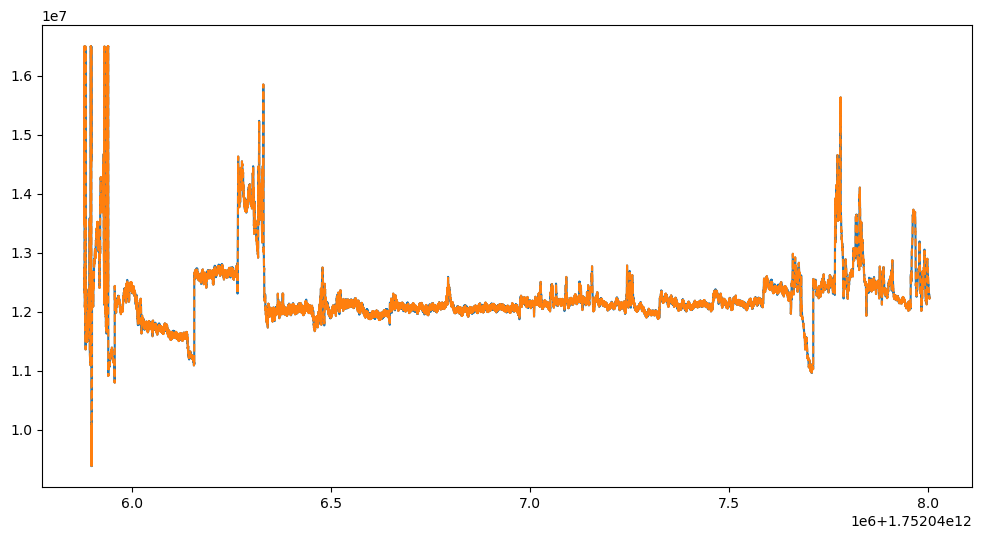

In [55]:

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 0], df.iloc[:, 1], label='Original PPG')
# plt.show()
plt.plot(aligned_df.iloc[:,0], aligned_df.iloc[:, 1], label='Aligned PPG', linestyle='--')

# plt.plot(imu_df1.iloc[:, 0], imu_df1.iloc[:, 1], label='IMU Data', linestyle=':')